[0.7        0.69135802 0.68271605 0.67407407 0.6654321  0.65679012
 0.64814815 0.63950617 0.6308642  0.62222222 0.61358025 0.60493827
 0.5962963  0.58765432 0.57901235 0.57037037 0.5617284  0.55308642
 0.54444444 0.53580247 0.52716049 0.51851852 0.50987654 0.50123457
 0.49259259 0.48395062 0.47530864 0.46666667 0.45802469 0.44938272
 0.44074074 0.43209877 0.42345679 0.41481481 0.40617284 0.39753086
 0.38888889 0.38024691 0.37160494 0.36296296 0.35432099 0.34567901
 0.33703704 0.32839506 0.31975309 0.31111111 0.30246914 0.29382716
 0.28518519 0.27654321 0.26790123 0.25925926 0.25061728 0.24197531
 0.23333333 0.22469136 0.21604938 0.20740741 0.19876543 0.19012346
 0.18148148 0.17283951 0.16419753 0.15555556 0.14691358 0.1382716
 0.12962963 0.12098765 0.11234568 0.1037037  0.09506173 0.08641975
 0.07777778 0.0691358  0.06049383 0.05185185 0.04320988 0.0345679
 0.02592593 0.01728395 0.00864198 0.        ]
the number of phi grid cells are 201
The number of theta grid cells are 81
The number

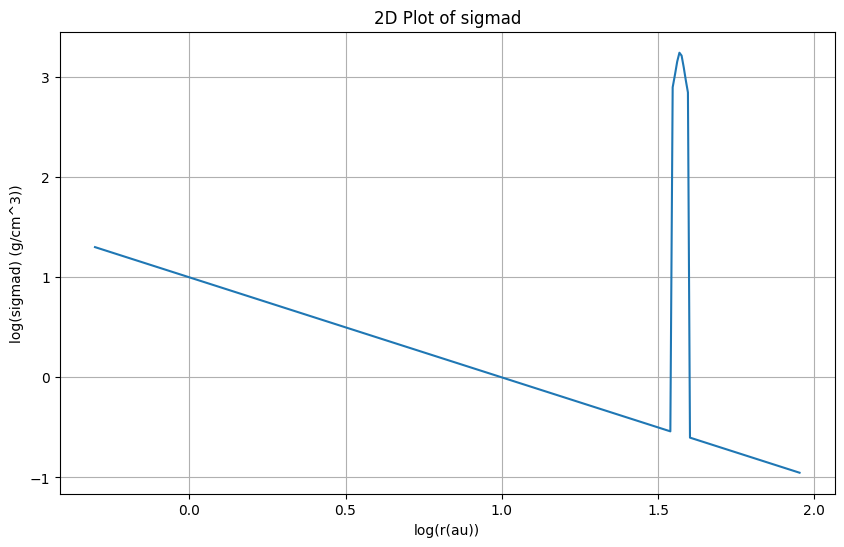

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat


In [1]:
import mockmodel as p
import numpy as np
from mpl_toolkits.mplot3d import axes3d
from matplotlib import pyplot as plt
from matplotlib import cm
from radmc3dPy.image import *
from radmc3dPy.analyze import *
from radmc3dPy.natconst import *


# Read the data
#
d     = readData()  # read from all output files? idk
rr,tt = np.meshgrid(d.grid.x,d.grid.y,indexing='ij')
zzr   = np.pi/2-tt


rhod  = d.rhodust[:,:,0,0]
temp  = d.dusttemp[:,:,0,0]

In [2]:
# Inspect the array informations in variable
#dtbg_mid, dtbg_sur, dtsm_mid, dtsm_sur all has size(100,200) and only have 0 value seems like
# zzr,rr,tt have size (100,32)

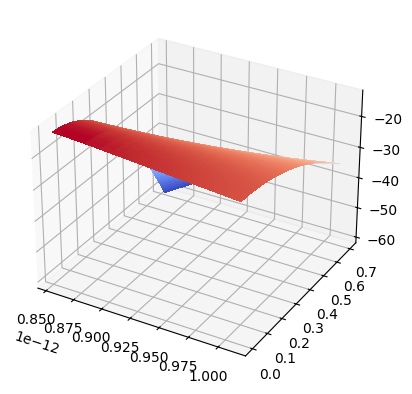

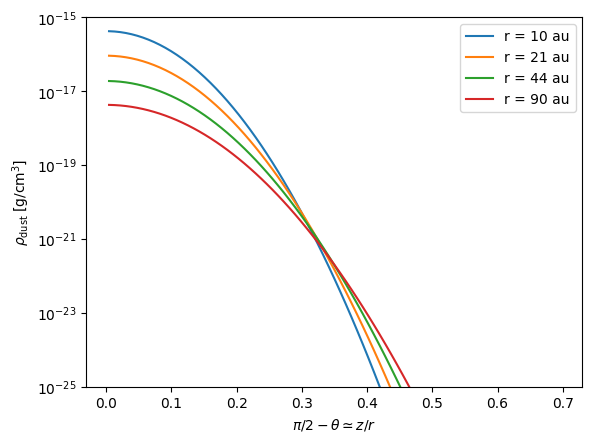

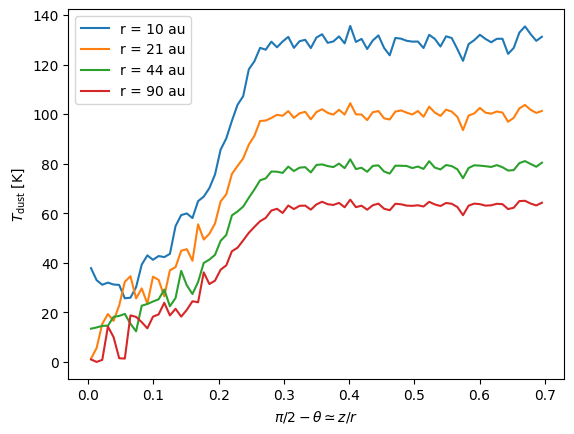

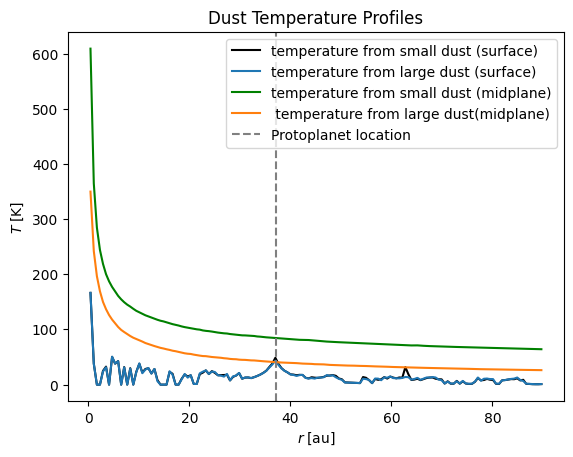

C:\Users\LHEM\AppData\Local\Temp\ipykernel_1604\3378162026.py:63: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), ':', label='temperature from small dust (surface)', color='black')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_1604\3378162026.py:64: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), ':', label='temperature from large dust (surface)', color='C0')


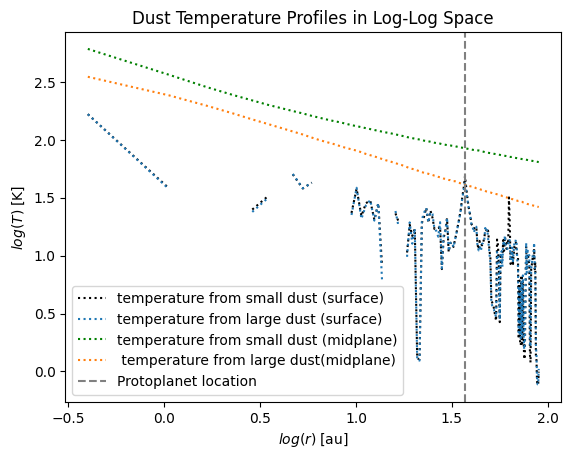

In [3]:


#
# View a surface plot of the density structure
#
fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.plot_surface(np.log10(rr)/au, zzr, np.log10(rhod), rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=False)

#
# Set the radii where to make the following plots
#
rpl = np.array([10,21,44,90])*au   # Radii where to make the plots
irr = np.array(np.interp(rpl,d.grid.x,np.arange(len(d.grid.x)))+0.5,dtype=int)  # Nearest radial grid point

#
# Plot the vertical density structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.semilogy(zzr[ir,:],rhod[ir,:],label=rstr)
plt.ylim((1e-25,1e-15))
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$\rho_{\mathrm{dust}}\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.legend()

#
# Plot the vertical temperature structure at different radii
#
plt.figure()
for ir in irr:
    r    = d.grid.x[ir]
    rstr = '{0:4.0f}'.format(r/au)
    rstr = 'r = '+rstr.strip()+' au'
    plt.plot(zzr[ir,:],temp[ir,:],label=rstr)
plt.xlabel(r'$\pi/2-\theta\simeq z/r$')
plt.ylabel(r'$T_{\mathrm{dust}}\;[\mathrm{K}]$')
plt.legend()

#
# Plot the radial midplane and surface temperature,
# and compare to the analytic estimate
#
plt.figure()
plt.title('Dust Temperature Profiles')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,0], '-', label='temperature from small dust (surface)', color='black')
plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0,1], '-', label='temperature from large dust (surface)', color='C0')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,0], label='temperature from small dust (midplane)', color='green')
plt.plot(d.grid.x / au, d.dusttemp[:, 0, 0,1], label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=37.2, color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$r\;[\mathrm{au}]$')
plt.ylabel(r'$T\;[\mathrm{K}]$')
plt.legend()

plt.show()

# An issue: super confused with which one is mid plane, which one is surface 
plt.figure()
plt.title('Dust Temperature Profiles in Log-Log Space')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,0]), ':', label='temperature from small dust (surface)', color='black')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0,1]), ':', label='temperature from large dust (surface)', color='C0')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,0]),':', label='temperature from small dust (midplane)', color='green')
plt.plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0,1]),':', label=' temperature from large dust(midplane)', color='C1')
#plt.plot(d.grid.x / au, d.dusttemp[:, -1, 0], '.', color='C1')
# Add a vertical line at r = 37.2 au
plt.axvline(x=np.log10(37.2), color='grey', linestyle='--', label='Protoplanet location')
plt.xlabel(r'$log(r)\;[\mathrm{au}]$')
plt.ylabel(r'$log(T)\;[\mathrm{K}]$')
plt.legend()

plt.show()


In [4]:
print(np.min(d.dusttemp[:, -1, 0, 0]))

0.0


C:\Users\LHEM\AppData\Local\Temp\ipykernel_1604\1986891067.py:5: RuntimeWarning: divide by zero encountered in log10
  axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 0]), color='black')
C:\Users\LHEM\AppData\Local\Temp\ipykernel_1604\1986891067.py:11: RuntimeWarning: divide by zero encountered in log10
  axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 1]), color='C0')


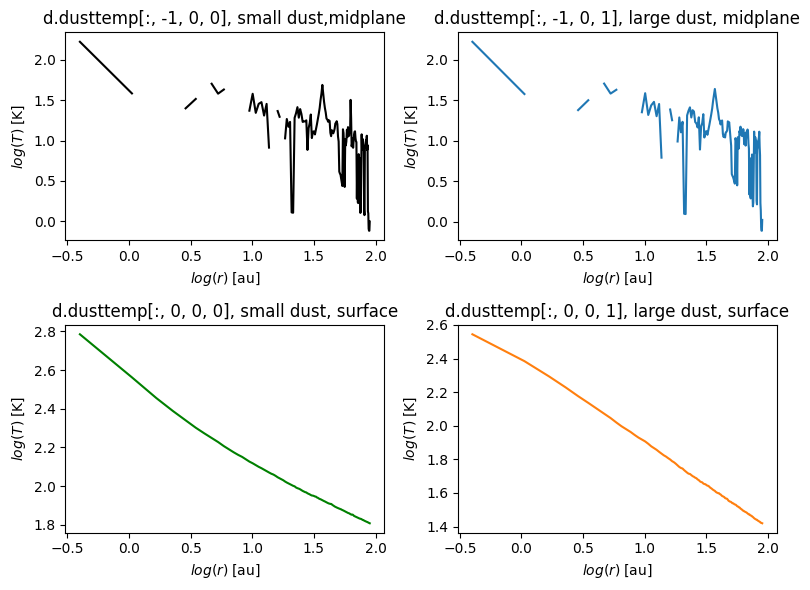

In [5]:
# Subplots of T in different theta layers
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 0]), color='black')
axs[0, 0].set_title('d.dusttemp[:, -1, 0, 0], small dust,midplane')
axs[0, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[0, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, -1, 0, 1]), color='C0')
axs[0, 1].set_title('d.dusttemp[:, -1, 0, 1], large dust, midplane')
axs[0, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[0, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

axs[1, 0].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 0]), color='green')
axs[1, 0].set_title('d.dusttemp[:, 0, 0, 0], small dust, surface')
axs[1, 0].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 0].set_ylabel(r'$log(T)\;[\mathrm{K}]$')


axs[1, 1].plot(np.log10(d.grid.x / au), np.log10(d.dusttemp[:, 0, 0, 1]), color='C1')
axs[1, 1].set_title('d.dusttemp[:, 0, 0, 1], large dust, surface')
axs[1, 1].set_xlabel(r'$log(r)\;[\mathrm{au}]$')
axs[1, 1].set_ylabel(r'$log(T)\;[\mathrm{K}]$')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [6]:
# How temperature changes with z for a given drop r
#I thi
print(d.dusttemp[20, :, 0,0])

[121.5224279  119.93946592 122.23079335 124.60213048 122.3495714
 117.35980416 115.64736046 120.91932855 120.52312362 119.74668935
 122.21049594 121.86495017 119.85133026 118.42597676 112.57798278
 117.29797259 120.97036217 121.80613973 117.92148583 120.65237204
 122.06509612 117.15393373 120.17083373 119.82439735 120.08792682
 120.8492114  120.55390688 114.5594579  117.83829181 121.01944498
 119.33661483 116.25071549 119.57837551 119.38502494 125.38478491
 119.30505692 121.48916489 119.19922117 119.85773062 121.86430298
 120.87915829 117.48124915 120.62058451 119.87519942 117.29676803
 121.49928104 119.35299722 118.01826473 118.87684655 117.02811679
 116.21729966 110.70856814 105.88918529  99.11369391  95.68023073
  90.02756658  81.8879002   77.67074421  66.72218019  64.53067362
  56.44523449  55.55516035  56.83286954  52.72116292  49.88466613
  46.62257154  44.3417231   42.84137918  45.51086928  39.80786966
  36.68998365  34.31569468  33.47074668  36.92787651  29.67900742
  26.046437

The shape of x is (150, 201)
The shape of y is (150, 201)


C:\Users\LHEM\AppData\Local\Temp\ipykernel_1604\152280388.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')


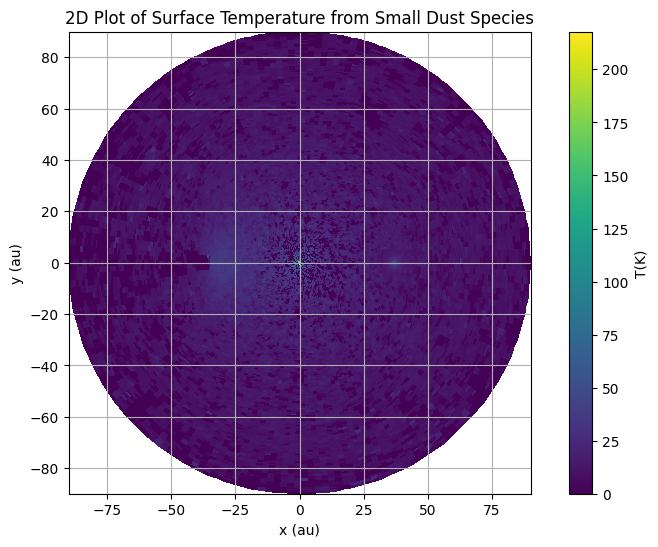

C:\Users\LHEM\AppData\Local\Temp\ipykernel_1604\152280388.py:31: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')


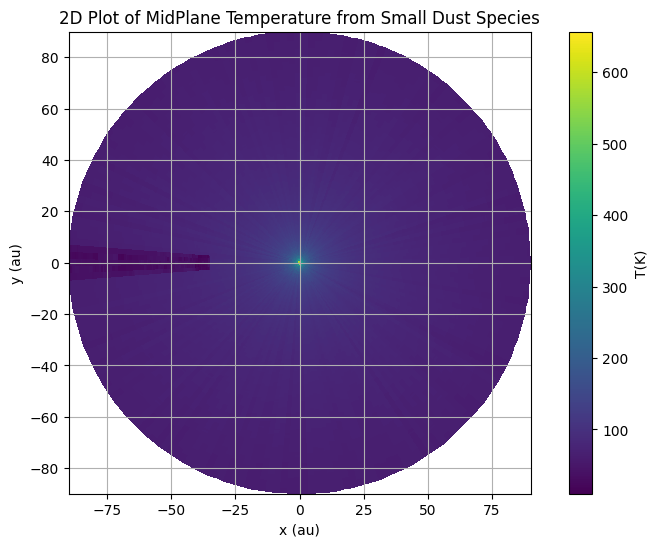

C:\Users\LHEM\AppData\Local\Temp\ipykernel_1604\152280388.py:42: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')


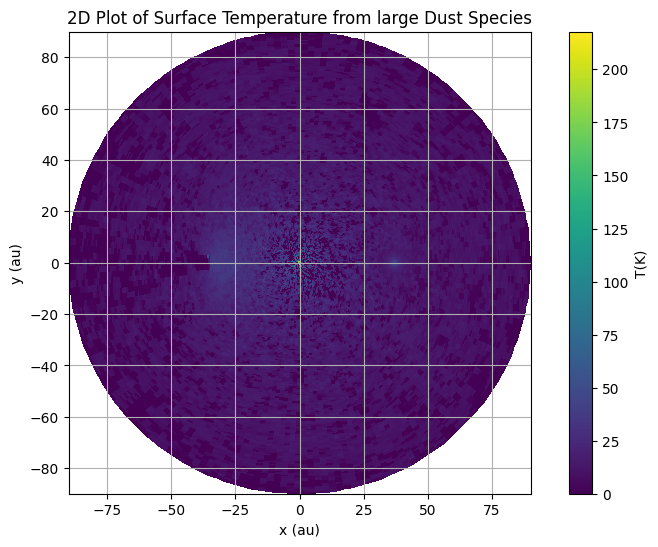

C:\Users\LHEM\AppData\Local\Temp\ipykernel_1604\152280388.py:53: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')


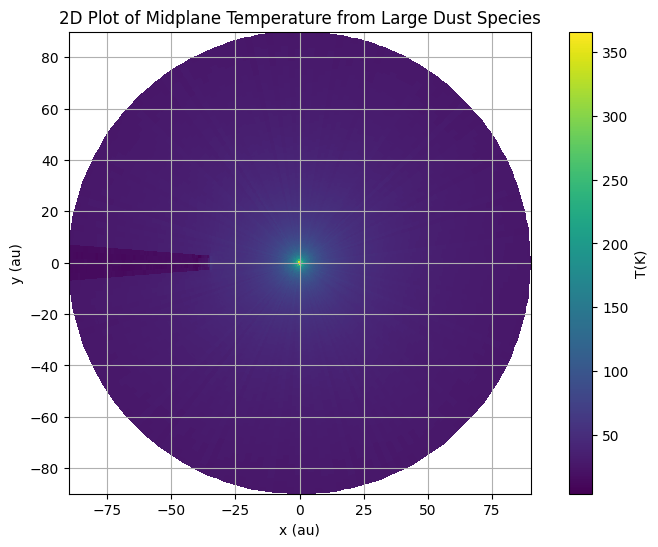

In [7]:
#2D plot of the temperature

dtsm_sur = d.dusttemp[:, -1, :,0] # surface rom the small dust specdies
dtsm_mid = d.dusttemp[:, 0, :,0] # surface rom the small dust specdies
dtbg_sur = d.dusttemp[:, -1, :,1] # surface rom the large dust specdies
dtbg_mid = d.dusttemp[:, 0, :,1] # surface rom the large dust specdies


# Create 2D grids for r and phi
r_grid, phi_grid = np.meshgrid(d.grid.x, d.grid.z, indexing='ij')

# Convert polar coordinates (r, phi) to Cartesian coordinates (x, y)
x = r_grid * np.cos(phi_grid)
y = r_grid * np.sin(phi_grid)
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of y is {np.shape(y)}')



plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtsm_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of MidPlane Temperature from Small Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_sur, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Surface Temperature from large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.pcolormesh(x/au, y/au, dtbg_mid, shading='auto', cmap='viridis')
plt.colorbar(label=r'T(K)')
plt.xlabel('x (au)')
plt.ylabel('y (au)')
plt.title('2D Plot of Midplane Temperature from Large Dust Species')
plt.gca().set_aspect('equal') 
plt.grid(True)
plt.show()

# Plot opacity

Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


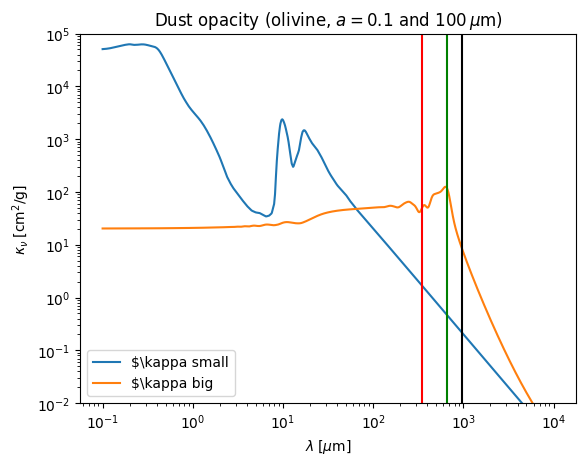

In [8]:

#
# Plot the opacity table
#
#
o1    = readOpac(ext='0.1_micron')
o2    = readOpac(ext='100_micron')
plt.figure()
#plt.loglog(o1.wav[0],o1.kabs[0],label=r'$\kappa_\nu^{\mathrm{abs}}$ (absorption) small',color='C0')
#plt.loglog(o1.wav[0],o1.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) small',color='C0')
plt.loglog(o1.wav[0],o1.kabs[0]+ o1.ksca[0],label=r'$\kappa small',color='C0')
plt.loglog(o2.wav[0],o2.kabs[0]+ o2.ksca[0],label=r'$\kappa big',color='C1')
#plt.loglog(o1.wav[0],o1.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) small',color='C0')
#plt.loglog(o2.wav[0],o2.kabs[0],label=r'$\kappa_\nu^{\mathrm{abs}}$ (absorption) big',color='C1')
#plt.loglog(o2.wav[0],o2.ksca[0],':',label=r'$\kappa_\nu^{\mathrm{scat}}$ (scattering) big',color='C1')
plt.ylim((1e-2,1e5))
plt.xlabel(r'$\lambda\;[\mu\mathrm{m}]$')
plt.ylabel(r'$\kappa_\nu\;[\mathrm{cm}^2/\mathrm{g}]$')
plt.title(r'Dust opacity (olivine, $a=0.1$ and $100\,\mu\mathrm{m}$)')
plt.axvline(x=345, color = 'red')
plt.axvline(x=652, color='green')
plt.axvline(x=970, color='black')   
plt.legend()

# need calculate optical depth through the CPD？

In [13]:
# Plot the optical depth
# adapted from plot_structure.py in the radmc3d github of run_ppdisk_fargo3d_1_axisymm


sig_d   = []  # store the dust surface densities
opacs   = []  # stores opacity for different dust species

# I have dustopac.inp and dustkappa.inp, don't have dustkapscatmat.inp
# I HAVE scattering opacity, but treated in just the Henyey-Greenstein non-polarized way, not the more realistic 

# I dont think I can do the polarization I need to change the dustkapp to dustscatkappa
with open('dustopac.inp','r') as f:   
    str=f.readline()
    str=f.readline()
    str=f.readline()
    for i in range(d.rhodust.shape[-1]):
        d.getSigmaDust(i)
        sig_d.append(d.sigmadust)   # reads the surface density of the dust species
        str=f.readline()
        str=f.readline()
        str=f.readline()
        ext=str.split()[0]
        o=readOpac(ext=ext,scatmat=False)  # I dont see this .ext entension
        opacs.append(o)
        str=f.readline()
        
values = [7500, 3000, 2000, 1621.62, 1304.35, 869.57, 652.17, 461.54, 344.83]

# Convert to a NumPy array
values_array = np.array(values)
taus    = []
for lam in values_array:
    kappas = []
    for o in opacs:
        kap = np.interp(lam,o.wav[0],o.kabs[0]+o.ksca[0]) # for each awvelength,interpolate the absorption and scattering opacity
        kappas.append(kap)
    tau = np.zeros((len(opacs),d.grid.nx,d.grid.nz))  # initialise the tau (optical depth array)
    for i,s in zip(np.arange(len(sig_d)),sig_d):
        tau[i,:,:] = s*kappas[i]   # tao is the product of surface density and opacity # stacked vertcial already
    taus.append(tau)


# Is kappa per mass of per volume?
# Write the formula for this 
# gcm^-2 (sigmad) * cm^2g^-1 (kappa)?



Reading dustkappa_0.1_micron.inp
Reading dustkappa_100_micron.inp


In [17]:
print(np.shape(d.rhodust))
print(d.rhodust.shape[-1])
print(np.shape(taus))
print(d.grid.nz)

(150, 81, 201, 2)
2
(9, 2, 150, 201)
201


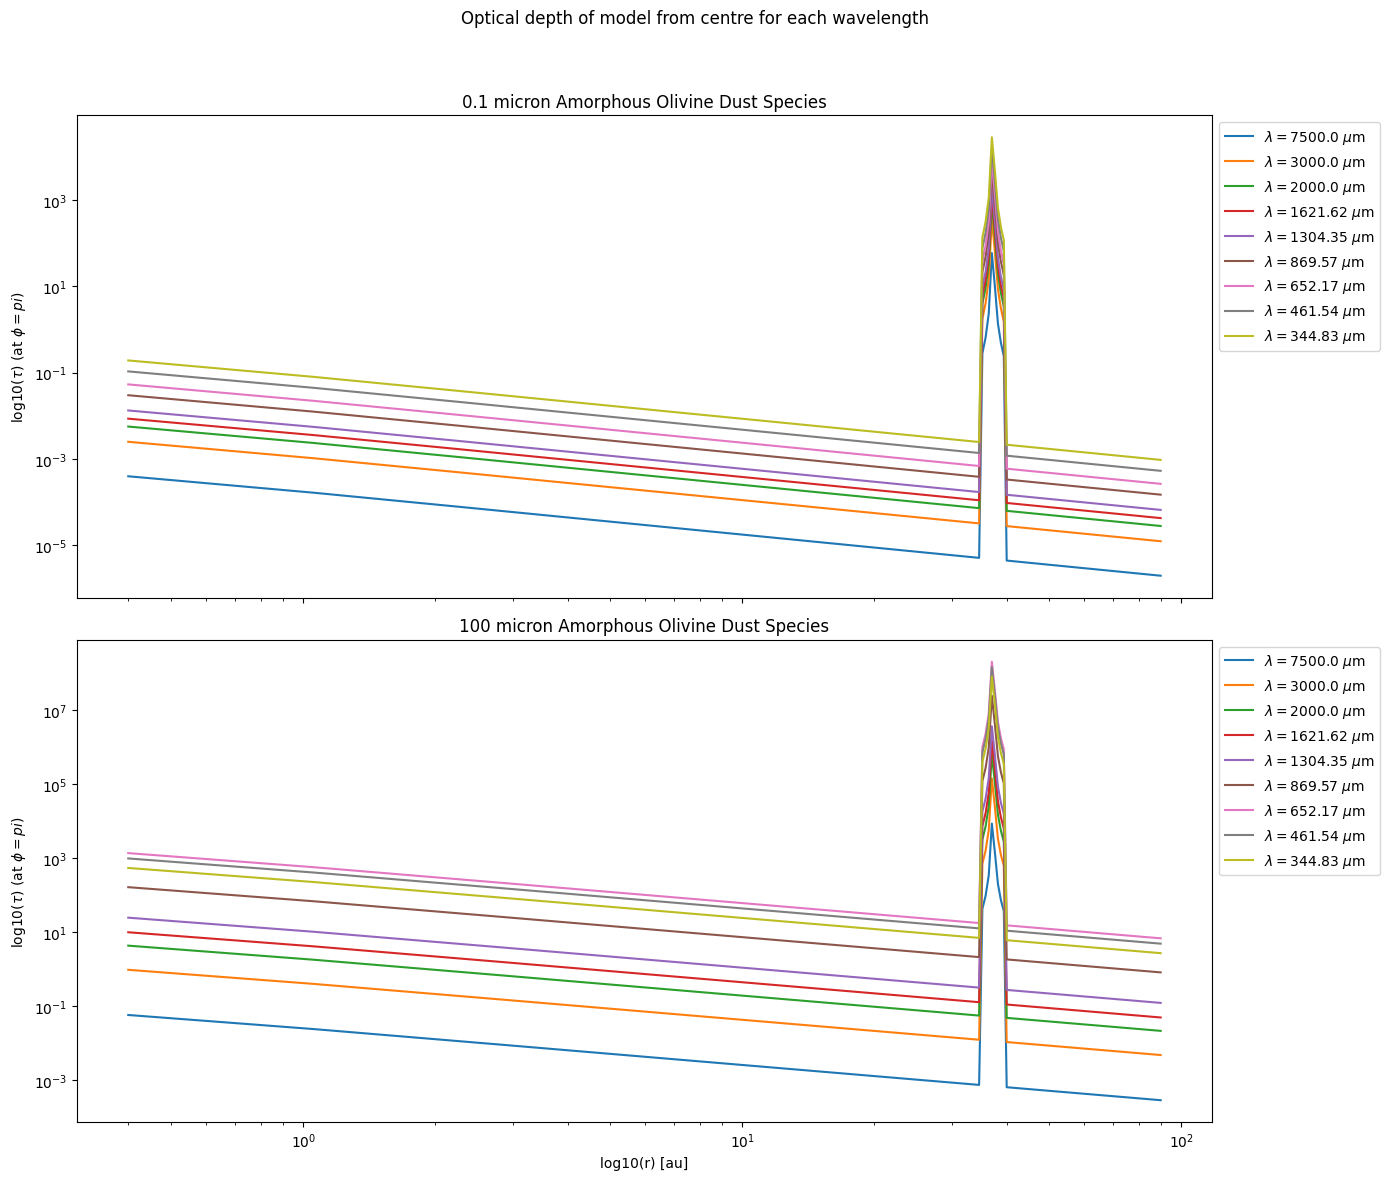

In [18]:

fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)  # Two subplots (1 row, 2 columns)

fig.suptitle('Optical depth of model from centre for each wavelength')
sizelabel = ['0.1 micron','100 micron']
for i in range(len(opacs)):  # Iterate over species
    ax = axes[i]  
    for lam, tau in zip(values_array, taus):
        ax.loglog(d.grid.x / au, tau[i][:, 100],  # phi is 0
                  label=r'$\lambda={}$'.format(lam) + r' $\mu\mathrm{m}$')
    if i ==  1:
        ax.set_xlabel('log10(r) [au]')
    ax.set_ylabel(r'log10($\tau$) (at $\phi=pi$)')  # Only label y-axis for the first subplot
    ax.set_title(f'{sizelabel[i]} Amorphous Olivine Dust Species')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()

In [ ]:
phi_max = np.arctan(1/37.2) # Azimuthal range of the CPD region
phi_min = 2*np.pi - phi_max

print(phi_max, phi_min)

0.02687524808475684 6.2563100590948295


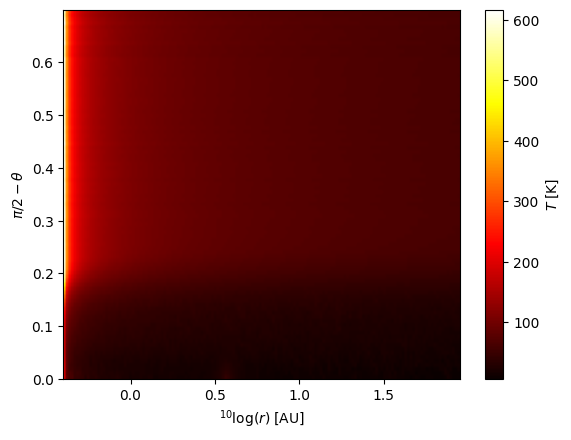

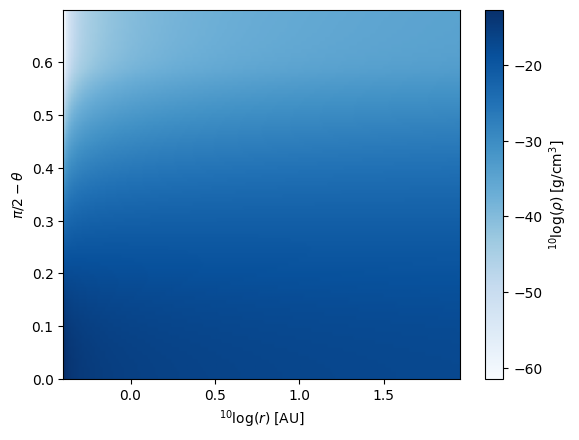

In [ ]:

# plot the density

lgrin  = np.log10(a.grid.x[0]/au)
lgrout = np.log10(a.grid.x[-1]/au)
plt.figure()
plt.imshow(np.log10(a.rhodust[:,:,0,0].T),extent=[lgrin,lgrout,0,np.pi/2-a.grid.y[0]],aspect='auto',cmap=cm.Blues)
plt.xlabel(r'$^{10}\log(r)\; [\mathrm{AU}]$')
plt.ylabel(r'$\pi/2-\theta$')
cbar=plt.colorbar()
cbar.set_label(r'$^{10}\log(\rho)\;[\mathrm{g}/\mathrm{cm}^3]$')
plt.show()